In [1]:
import random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# 0. Introduction

Remember last time, we looked at marbles, and we wanted to know the chances of pulling a certain marble(s) out of a bag, based on the marble counts that we had available to us?

In [3]:
marble_colors = ["black", "white"]

In [4]:
marble_bag = [marble_colors[random.randint(0, 1)] for i in range(100)]

In [5]:
counts = Counter(marble_bag)

We can visualize our bag, and the probability of pulling a white _or_ black marble from it, as follows:

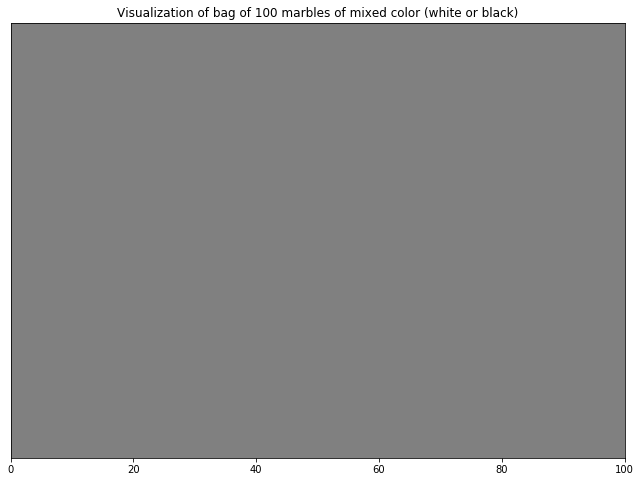

In [6]:
# create new figure
fig = plt.figure(figsize=(11, 8))

# plot grey area
plt.axvspan(0, 100, color="grey")

# adjust x-axis
fig.axes[0].set_xlim(0, 100)

# adjust y-axis
fig.axes[0].get_yaxis().set_visible(False)

# add title
title = plt.title("Visualization of bag of 100 marbles of mixed color (white or black)")

Now, let's visualize the distributions of the colors in the bag, separated out:

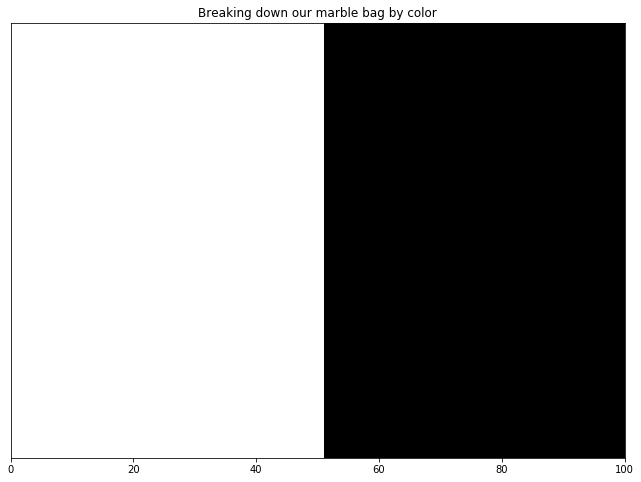

In [7]:
fig = plt.figure(figsize=(11, 8))

plt.axvspan(0, 100 - counts["black"], color="white")
plt.axvspan(100 - counts["black"], 100, color="black")

fig.axes[0].set_xlim(0, 100)
fig.axes[0].get_yaxis().set_visible(False)

title = plt.title("Breaking down our marble bag by color")

And, as we discussed last time, to get the probability of pulling a marble of a _particular_ color from the bag, we divide the number of marbles of that color in the bag by the total number of marbles in the bag.

What we've done is to create a _rule_ that _maps_ the:
- the color we'd like
- our bag of marbles

to:
- the chances that we pull a marble of our specified color from our bag

In other words, we've created a _function_, which takes as input elements from one set (all marbles in the bag) and returns back an element from another set, with our return set being the numbers on the interval [0, 1], which represent the probability of randomly drawing a certain colored marble from the bag.

We can symbolize this as:

$${p_{color} = {f(bag, color)} = \frac{|bag_{marble\_color = color}|}{|bag|}}$$

where:
- $p_{event}$ refers to the probability of `event`
- ${f(parameter)}$ to a function that takes `parameter` as input
- and ${|set|}$ to the number of elements in `set`

Now, how would we visualize the probability of first drawing a white marble, and then drawing a black marble?

In [37]:
def proba_marble(marble_bag, desired_color):
    # get total number of marbles in bag
    num_marbles_total = sum(marble_bag.values())
    
    # get number of marbles of desired color
    num_marbles_desired_color = marble_bag[desired_color]
    
    # return quotient
    return num_marbles_desired_color / num_marbles_total

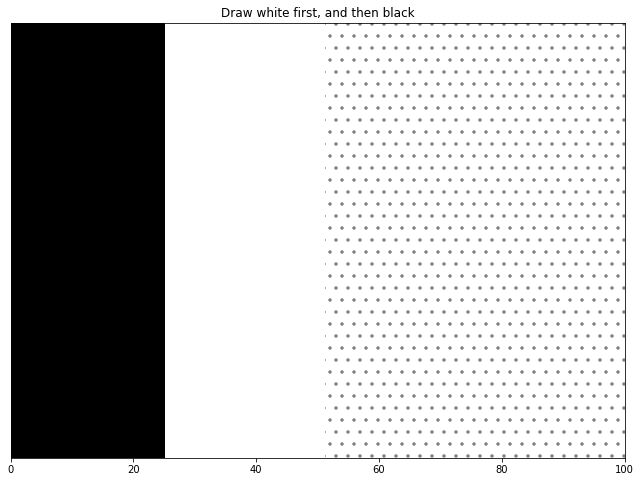

In [36]:
fig = plt.figure(figsize=(11, 8))

plt.axvspan(0, 100, facecolor="none", hatch=".", edgecolor="grey", linewidth=0.0)

# get probabilities
draw_white_first = proba_marble(counts, "white")
then_draw_black = draw_white_first * proba_marble(counts, "black")

plt.axvspan(0, draw_white_first * 100, color="white")
plt.axvspan(0, then_draw_black * 100, color="black")

fig.axes[0].set_xlim(0, 100)
fig.axes[0].get_yaxis().set_visible(False)

title = plt.title("Draw white first, and then black")

So we've made some mappings that involved _probability_, which we're calculating through simple division - what other types of functions can we create?

# 1. Functions

### Am I hungry?

Let's say you had a to write a function called `am_i_hungry`, which would take as input the number of calories you've consumed in the last hour, and which would produce as output a measure indicating whether or not you're hungry - what would that look like for you?

In [10]:
def am_i_hungry(num_calories_past_hour):
    # just return one, no matter the value of num_calories_past_hour,
    # because I'm always hungry :)
    return 1

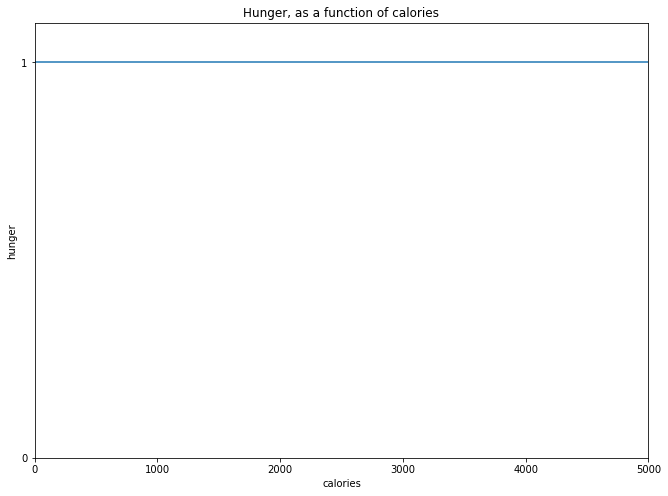

In [42]:
fig = plt.figure(figsize=(11, 8))

# create array of calorie values evenly spaced between 0 and 5000
calories = np.linspace(0, 5000)

# for each calorie value, return am_i_hungry of that value and 
# retain that value in the hunger list
hunger = []
for c in calories:
    hunger.append(am_i_hungry(c))

# plot where x is calories and y is hunger
plot = plt.plot(calories, hunger)

xlab = fig.axes[0].set_xlim(0, 5000)

ylab = fig.axes[0].set_ylim(0, 1.1)
ylab = fig.axes[0].set_yticks([0, 1])

xlab = fig.axes[0].set_xlabel("calories")
ylab = fig.axes[0].set_ylabel("hunger")

title = plt.title("Hunger, as a function of calories")

**Notes**

This is a _constant_ function, as its output _does not change_ as the value for `calories` changes.

### Taxi Cab

Let's say you're going out to dinner and you're trying to figure out whether to take the cab or a subway. There are many considerations of course - weather, what train line(s) you are near, how many people you have, etc. - but an important one is _cost_. 

Can we create a simple function to map distance traveled to a price in dollars?

Input:
- distance (miles)

Output:
- price ($)

If you need help, you can see the actual NYC rates [here](http://www.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml) and _functionalize_, if you will, those figures - but feel free to just wing it (bonus points for creativity)!

In [13]:
def estimate_taxi_cost(distance):
    # $2.50 initial fee + $.50 for every mile
    estimated_cost = 2.5 + .5 * distance
    return estimated_cost

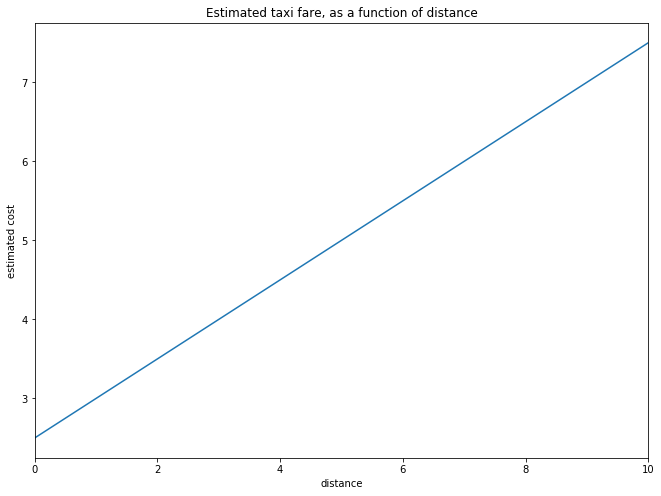

In [48]:
fig = plt.figure(figsize=(11, 8))

distances = np.linspace(0, 10)

costs = []
for d in distances:
    costs.append(estimate_taxi_cost(d))

plot = plt.plot(distances, costs)

xlab = fig.axes[0].set_xlim(0, 10)

xlab = fig.axes[0].set_xlabel("distance")
ylab = fig.axes[0].set_ylabel("estimated cost")

title = plt.title("Estimated taxi fare, as a function of distance")

**Notes**

This is a _linear_ function, meaning it produces output in a straight line, as there is a _constant relationship between the distance travelled and our estimated cost_. Notice that our blue line intercepts the _y-axis_ at 2.5 (the cost of the initial / flat fee for every new fare).

### Speed of falling apple

Let's say you head over to the kitchen to grab a snack, and you're really jonsing for an apple. Unfortunately, by the time you get there, the only apple left is one that's already pretty bruised and whatnot, and you're kind of annoyed. You have an impulse to throw it on the ground, but that'd be kind of barbaric and loud and that would bother Sara. And then you think to yourself: it'd be much more interesting to instead consider the _physics_ of the falling apple.

Let's say that we were to hold the apple still (i.e. no initial movement) and then drop it - can we create a simple function to map the the apple's time in the air to the distance it would fall over that period of time?

Input:
- time in air (seconds)

Output:
- distance fell (meters)

If you need help, you can check [this](https://www.mathopenref.com/calceqofmotion.html) out, or pair up with someone who took physics!

In [44]:
def distance_fell(time_in_air):
    # based on initial velocity of 0...
    # gravitational acceleration is -9.81 (m / s^2)
    # we are ignoring air resistance & terminal velocity
    return 9.8 * (time_in_air) ** 2

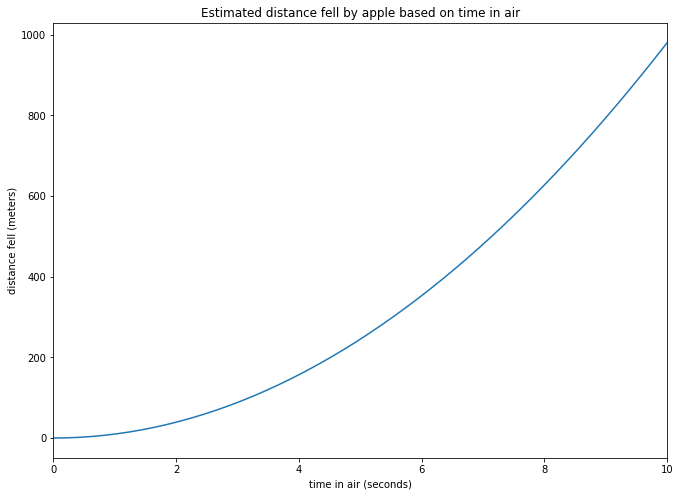

In [47]:
fig = plt.figure(figsize=(11, 8))

times_in_air = np.linspace(0, 10)

distances = []
for t in times_in_air:
    distances.append(distance_fell(t))

plot = plt.plot(times_in_air, distances)

xlim = fig.axes[0].set_xlim(0, 10)

xlab = fig.axes[0].set_xlabel("time in air (seconds)")
ylab = fig.axes[0].set_ylabel("distance fell (meters)")

title = plt.title("Estimated distance fell by apple based on time in air")

What do we notice here, especially as compared to the taxi fare function? 

For one, this line is _curved_ - i.e. it's non-linear. In more detail: not only is this function's output not constant, the relationship it describes between time in the air and distance travelled is also not constant.

In this case, the line is increasing in both value and steepness - this is _convexity_. To get more of a sense into the power of this sort of a curve, look at the _y-axis_ where the _x-axis_ is 0 and where the _x-axis_ is 10: we get 0 and just under 1000 (to be precise, 981), respectively. Compare this to our taxi fare plot: over [0, 10] on the _x-axis_ we go from 2.5 to 7.5. So the apple function's output changes _much_ more quickly as its input changes.

An important takeaway here, which we'll dive into in our _calculus_ sessions, is that the relationship between, not distance and time in the air, but _changes_ in distance with respect to _changes_ time in the air, is _linear_. Put differently, the _slope_ of this function (which is in fact what we'd call a _quadratic_ function) is linear, whereas the linear taxi function had a constant slope.

The above graph represents what is really _position_ (I'm calling it _distance fell_ since we are starting at an arbitrary poisiton of 0 and moving only downwards). The slope of position is velocity (speed, but with a sign indicating direction), and the slope of velocity is acceleration. Trippy, right? More on that in _calculus_.

### Pyramid schemes

Let's say a friend comes up to you and says - "hey, I've got this new business, where you can make a lot of money by creating a business, and then getting other people to start businesses" - what do you do? Well, first - run! And then call the FTC!

Why? Because this could be an example of what's called a _pyramid scheme_. Let's say in this particular scheme, you have to hire exactly 3 people to create businesses for you, and they are each allowed to hire 3 people, and so on... can we create a function to map the number of "levels" of your illegal business to the total number of people involved in it?

Input:
- number of organizational levels

Output:
- total number of employees

If you need help, see [here](https://en.wikipedia.org/wiki/Pyramid_scheme).

In [20]:
def total_pyramid_employees(num_levels):
    # the below calculation is "3 to the power of num_levels"
    levels = 3 ** num_levels
    return levels

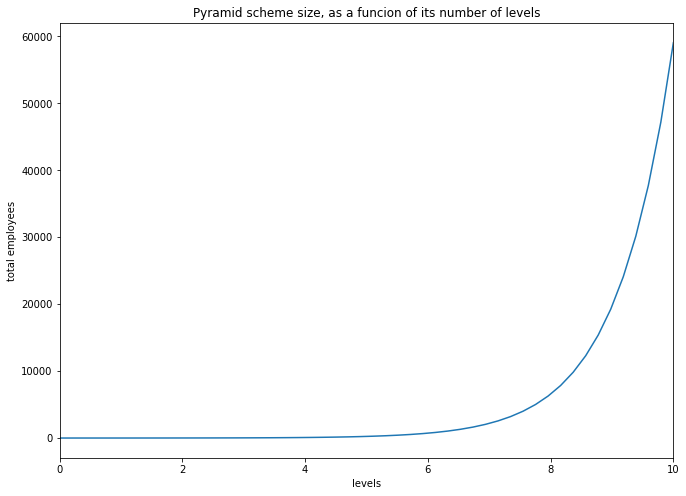

In [52]:
fig = plt.figure(figsize=(11, 8))

x = np.linspace(0, 10)

plot = plt.plot(x, list(map(total_pyramid_employees, x)))

xlab = fig.axes[0].set_xlim(0, 10)

xlab = fig.axes[0].set_xlabel("levels")
ylab = fig.axes[0].set_ylabel("total employees")

title = plt.title("Pyramid scheme size, as a funcion of its number of levels")

This is what's called an _exponential_ function, and these are generally the most quickly growing function families you'll encounter. Compare this to the apple function: at _x=10_, we've already reach almost _y=60,000_!

### Searching for an item in a sorted list

Let's say you have a list of numbers, and you're trying to see if a given number is in that list - how many tries would it take you to figure that out?

In [50]:
def num_iterations(num_to_find, list_of_numbers, iterations):
    # increment iterations by 1
    iterations += 1
    
    # get number of items in passed list
    length = len(list_of_numbers)
    
    # if list is empty or only has one item, return iterations
    if length <= 1:
        return iterations
    
    # get midpoint of list by taking floor of (length / 2)
    midpointish = length // 2
    
    # if midpoint of list is our number, we're done!
    if num_to_find == list_of_numbers[midpointish]:
        return iterations
    
    # if our number is bigger than the midpoint, recurse using top half of list
    elif num_to_find > list_of_numbers[midpointish]:
        return num_iterations(num_to_find, list_of_numbers[midpointish:], iterations)
    
    # otherwise, recurse using bottom half of list
    else: 
        return num_iterations(num_to_find, list_of_numbers[:midpointish], iterations)

In the above function, instead of looking at _every_ item in the list to see if the number we're looking for is there, we play a trick that takes advantage of the fact that the list is sorted - we continue chopping the list in two, based on whether the number we're looking for would be in the bottom or top half. This procedure is known as either the [bisection or binary search algorithm](https://en.wikipedia.org/wiki/Binary_search_algorithm). 

This process repeats itself _recursively_ until the number's either found or confirmed to not be in the list. What is [recursion](https://www.google.com/search?q=recursion)? 

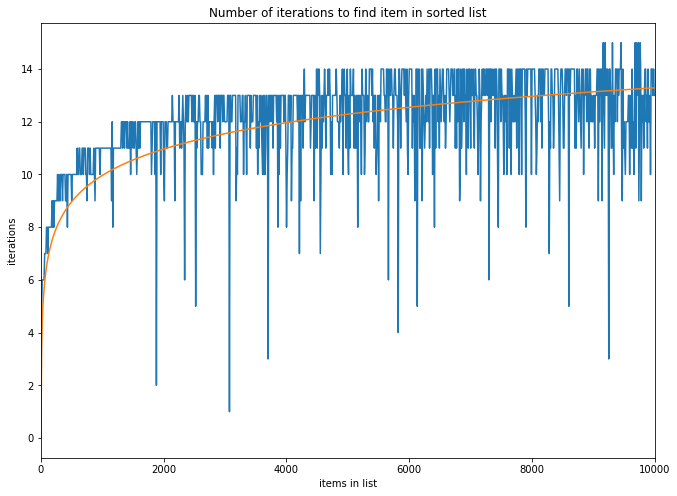

In [51]:
fig = plt.figure(figsize=(11, 8))

# generate list sizes on interval [1, 10000) stepping by 10
list_lengths = range(1, 10000, 10)

# create empty list to hold results
iterations = []

# for each list length l:
for l in list_lengths:
    # create new list of l random numbers between 0 and 100, and then sort the list
    new_list = sorted([random.randint(0, 10000) for i in range(l)])
    # randomly select a number between 0 and 10000
    new_num = random.randint(0, 10000)
    # record number of iterations it takes to find (or not find) number in the list
    iterations.append(num_iterations(new_num, new_list, 0))

plot = plt.plot(list_lengths, iterations)
# also plot log2 over same interval (list lengths) for comparison
plot = plt.plot(list_lengths, list(map(np.log2, list_lengths)))

xlab = fig.axes[0].set_xlim(0, 10000)

xlab = fig.axes[0].set_xlabel("items in list")
ylab = fig.axes[0].set_ylabel("iterations")

title = plt.title("Number of iterations to find item in sorted list")

We can see some downward spikes in the above plot, which represent occurences where the number we're looking for happened to be found rather quickly - in general, this function does a pretty good job of tracking the function ${log_{2}}$ over the same _x_ interval.

What is ${log_{2}}$? The logarithm is a function that helps us to invert and / or unpack exponential and power functions. In more detail, if ${log_{2}x = y}$ then $2^{y} = x$. Make sense? Logarithms can be very useful in applied data science as they can, among other things, help you to reshape your data for analysis purposes, and allow for easier calculations on time series data - the list goes on.

Also, look at how slowly our function has increased: x climbs all the way to _10,000_ but y peaks at _15_! Notice that our log function is non-linear. Specifically, note that it's increasing as x increases, but also that the rate at which it's increasing is, in fact, decreasing. This is _concavity_. This concavity is very attractive in a search algorithm, as it means that the size of the data can increase at much higher rate than the number of computations required to run the algorithm.